In [1]:
# Importing the required libraries
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP libraries
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# ML Algo
from sklearn.naive_bayes import MultinomialNB

# Validation Metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Importing the data
data = pd.read_csv('/content/sms_spam.csv')
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# data dimension
print(f"the data has {data.shape[0]} rows and {data.shape[1]} columns")

the data has 5574 rows and 2 columns


In [13]:
# data distribution
round(data['type'].value_counts(normalize=True)*100, 1)

,proportion
type,
ham,86.6
spam,13.4


In [14]:
# Statistical nature of the text columns
data.describe()

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


In [15]:
# Statistical summary of the data WRT target
data.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

In [18]:
# creating a length column to understand more about text
data['length'] = data['text'].apply(len)
data.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


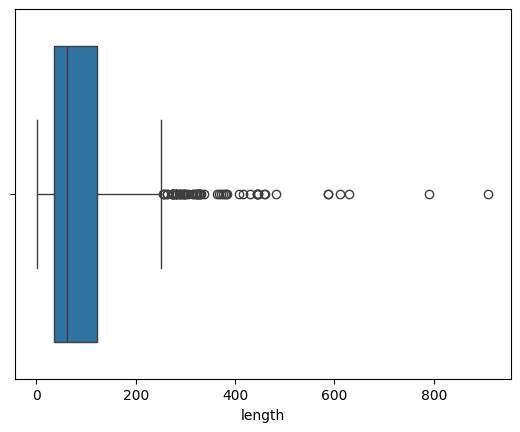

In [21]:
# Distribution of text messages
sns.boxplot(data['length'], orient='h')
plt.show()

In [ ]:
# statistics of message length
data['length'].describe()

,length
count,5574.000000
mean,80.444923
std,59.841828
min,2.000000
25%,36.000000
50%,61.000000
75%,122.000000
max,910.000000


In [ ]:
# understanding the lengthy message
data[data['length'] == data['length'].max()]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [ ]:
# understanding the shortest message
data[data['length'] == data['length'].min()]['text'].value_counts()

,count
text,
Ok,4
:),1


In [ ]:
# Text preprocessing
message = 'Th@#is is a^ message with some! punctuations and special characters.'
no_punc = [letter for letter in message if letter not in string.punctuation]
out_message = ''.join(no_punc)
print(out_message)

This is a message with some punctuations and special characters


In [ ]:
# List of stopwords
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
# mess = 'th&is a dummy stri#ng with stop words an%d punctuations'
# no_punc = [letter for letter in mess if letter not in string.punctuation]
# out_mess = ''.join(no_punc)
# out_msg = [word for word in out_mess.split() if word.lower() not in stopwords.words('english')]
# out_msg# Function to remove punctuation and stopwords
def text_process(mess):
    no_punc = [letter for letter in mess if letter not in string.punctuation]
    out_mess = ''.join(no_punc)
    return [word for word in out_mess.split() if word.lower() not in stopwords.words('english')]
# IF YOU HAVE DOUBT IN THIS FUNCTION CHECK THE ABOVE CODE BLOCK

In [ ]:
# Sample data before applying the function
data['text'].head()

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Sample data after applying the function
data['text'].head().apply(text_process)

# THIS FUNCTION IS NOT MODIFYING THE RAW DATA

,text
0,"[Go, jurong, point, crazy, Available, bugis, n..."
1,"[Ok, lar, Joking, wif, u, oni]"
2,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,"[U, dun, say, early, hor, U, c, already, say]"
4,"[Nah, dont, think, goes, usf, lives, around, t..."


In [ ]:
# Word Embedding

# bow for tfidf vocabulary
bow = CountVectorizer(analyzer=text_process).fit(data['text'])
print(len(bow.vocabulary_))

11401


In [ ]:
# transforming our bow to Document-term matrix.
message_bow = bow.transform(data['text'])
message_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 50544 stored elements and shape (5574, 11401)>

In [ ]:
# Bow Mapping
print(message_bow)

# 5574 - Total number of documents
# 11401- Total unique words (Vocabulary)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 50544 stored elements and shape (5574, 11401)>
  Coords	Values
  (0, 1110)	1
  (0, 1483)	1
  (0, 2058)	1
  (0, 4647)	1
  (0, 5211)	1
  (0, 5212)	1
  (0, 5760)	1
  (0, 6205)	1
  (0, 6894)	1
  (0, 6925)	1
  (0, 7537)	1
  (0, 7650)	1
  (0, 8318)	1
  (0, 8899)	1
  (0, 10945)	1
  (0, 11142)	1
  (1, 2445)	1
  (1, 3059)	1
  (1, 7683)	1
  (1, 8572)	1
  (1, 10679)	1
  (1, 11051)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5570, 6679)	1
  (5570, 6870)	1
  (5570, 7145)	1
  (5570, 11394)	1
  (5571, 3223)	1
  (5571, 3716)	1
  (5571, 8234)	1
  (5571, 10181)	1
  (5572, 4502)	1
  (5572, 5049)	1
  (5572, 5245)	1
  (5572, 6270)	1
  (5572, 6687)	1
  (5572, 6787)	1
  (5572, 6972)	1
  (5572, 7273)	1
  (5572, 7380)	1
  (5572, 7782)	1
  (5572, 8402)	1
  (5572, 9897)	1
  (5572, 10768)	1
  (5572, 10986)	1
  (5573, 3426)	1
  (5573, 8330)	1
  (5573, 10629)	1


In [ ]:
# (0, 1110)  1   ->  In document 0, the word with index 1110 appears 1 time.

In [ ]:
# Tfidf Vectorizer
message_tfidf = TfidfTransformer().fit(message_bow).transform(message_bow)
message_tfidf.shape

(5574, 11401)

In [ ]:
# TF-IDF Value
print(message_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50544 stored elements and shape (5574, 11401)>
  Coords	Values
  (0, 1110)	0.28828459898893377
  (0, 1483)	0.3125357690523998
  (0, 2058)	0.2420402708624076
  (0, 4647)	0.3125357690523998
  (0, 5211)	0.29834974396666064
  (0, 5212)	0.26870529747253846
  (0, 5760)	0.24984740383972864
  (0, 6205)	0.1891588424976738
  (0, 6894)	0.15158985673221018
  (0, 6925)	0.18347278575774867
  (0, 7537)	0.3125357690523998
  (0, 7650)	0.2640334289254678
  (0, 8318)	0.17047287571100914
  (0, 8899)	0.24704694620162193
  (0, 10945)	0.19073747309736885
  (0, 11142)	0.23026810232333333
  (1, 2445)	0.5619816842520484
  (1, 3059)	0.29120672453799534
  (1, 7683)	0.37674276971445636
  (1, 8572)	0.5043365091357772
  (1, 10679)	0.20637541507921356
  (1, 11051)	0.4006170106480546
  (2, 73)	0.2253848534794693
  (2, 423)	0.0963965137623166
  (2, 430)	0.21778125645306098
  :	:
  (5570, 6679)	0.4778073440068897
  (5570, 6870)	0.31368079307544483
  (5570, 71

In [ ]:
# ML Algorithm - Naive Bayes Classifier
spam_model = MultinomialNB().fit(message_tfidf, data['type'])

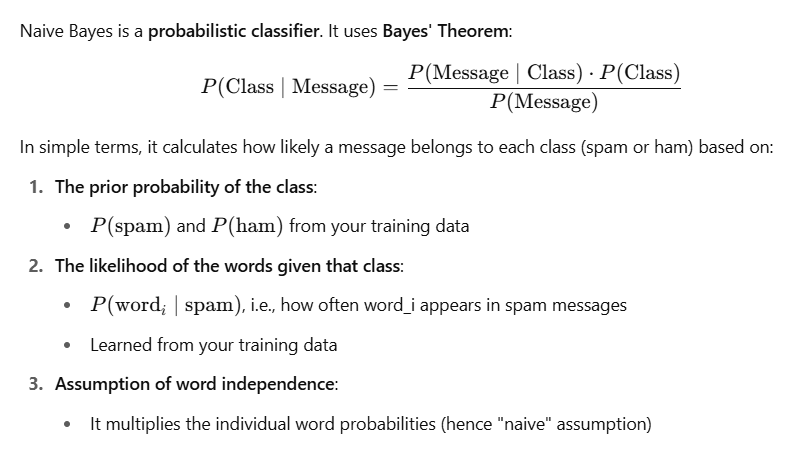

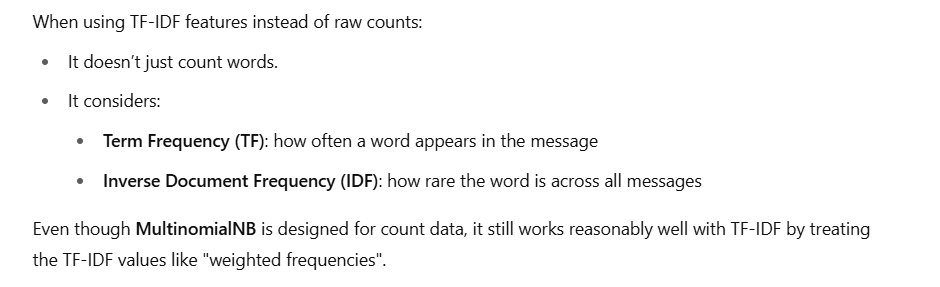

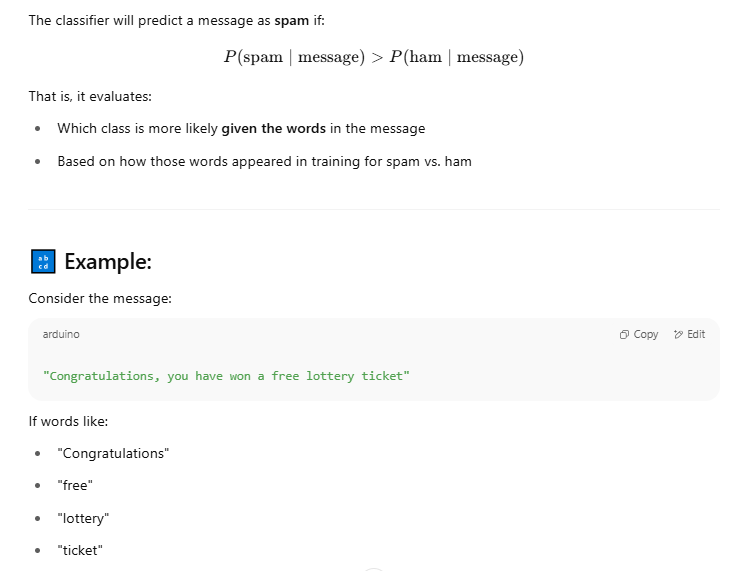

In [ ]:
# Prediction
pred = spam_model.predict(message_tfidf)
pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4827
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5574
   macro avg       0.99      0.92      0.95      5574
weighted avg       0.98      0.98      0.98      5574



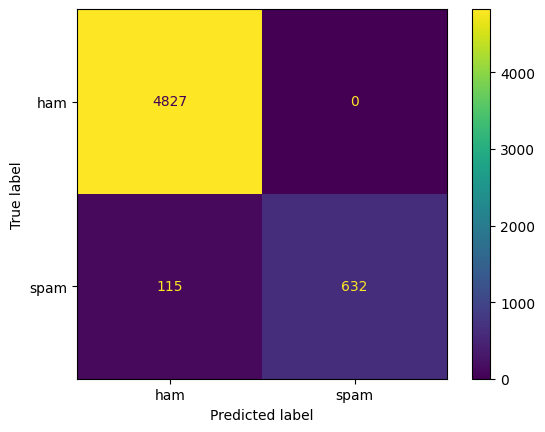

In [ ]:
# Metric comparision
cm = ConfusionMatrixDisplay.from_predictions(data['type'], pred)
print(classification_report(data['type'], pred))

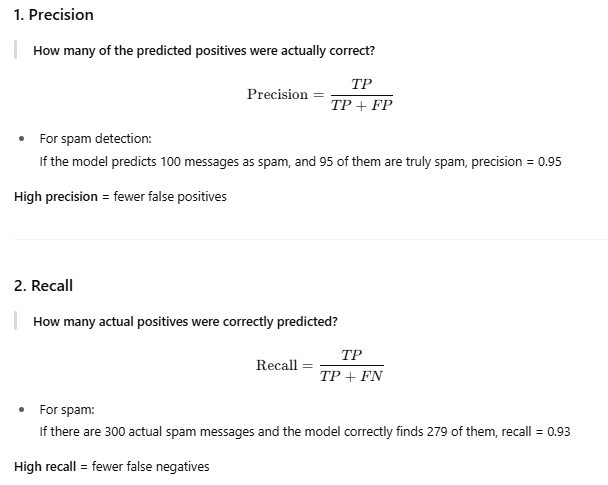

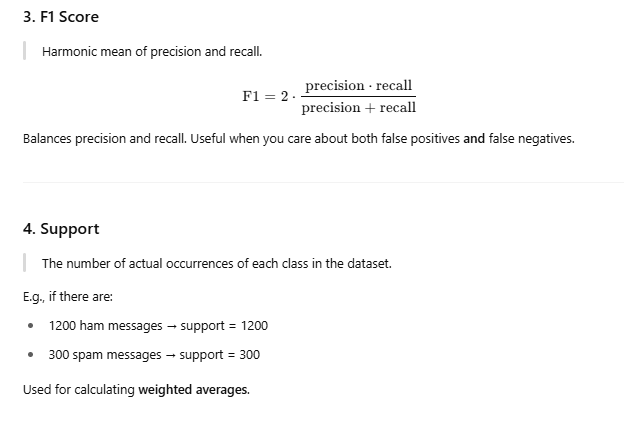